# 1. 데이터 파악 및 EDA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/신용카드 연체 예측

/content/drive/MyDrive/신용카드 연체 예측


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

In [ ]:
df = pd.read_csv("data/train.csv")
df.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [ ]:
df.describe()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26457.000000,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,13228.000000,0.428658,1.873065e+05,-15958.053899,59068.750728,1.0,0.224742,0.294251,0.091280,2.196848,-26.123294,1.519560
std,7637.622372,0.747326,1.018784e+05,4201.589022,137475.427503,0.0,0.417420,0.455714,0.288013,0.916717,16.559550,0.702283
min,0.000000,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,6614.000000,0.000000,1.215000e+05,-19431.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,1.000000
50%,13228.000000,0.000000,1.575000e+05,-15547.000000,-1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,2.000000
75%,19842.000000,1.000000,2.250000e+05,-12446.000000,-407.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,2.000000
max,26456.000000,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,2.000000


In [ ]:
df.shape

(26457, 20)

### 중복 데이터 확인


- 'begin_month', 'credit' 변수를 제외한 중복 데이터 10,000개 이상  
=> 동일 인물이 다른 시기에 카드 개설했다고 가정  
=> 데이터의 절반이 중복 데이터?  
=> 한 행으로 줄이는 대신 '개설 카드 개수' 열 추가

- 동일 인물이 카드를 개설하는 시기에 따라 신용도가 다를 수 있으므로 가장 최신의 카드를 개설했을 당시의 신용도를 남겨두고 나머지 데이터를 버림

In [ ]:
df.columns

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'credit'],
      dtype='object')

In [ ]:
cols = ['gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size']
df[df.duplicated(cols)]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
192,192,F,N,Y,0,135000.0,Working,Higher education,Married,House / apartment,-13299,-1628,1,0,0,0,Laborers,2.0,-14.0,2.0
210,210,F,Y,Y,1,225000.0,Working,Higher education,Separated,House / apartment,-14816,-1672,1,0,0,0,Core staff,2.0,0.0,1.0
319,319,F,N,N,1,225000.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-12640,-399,1,0,0,0,Accountants,3.0,-21.0,2.0
328,328,M,Y,Y,1,270000.0,Working,Secondary / secondary special,Married,House / apartment,-14488,-1630,1,0,1,0,Laborers,3.0,-22.0,2.0
330,330,F,N,N,0,270000.0,State servant,Secondary / secondary special,Separated,House / apartment,-19363,-12332,1,0,1,1,Medicine staff,1.0,-18.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26447,26447,M,N,Y,2,99000.0,Working,Secondary / secondary special,Married,House / apartment,-14226,-1026,1,1,1,0,Laborers,4.0,-43.0,2.0
26448,26448,M,N,Y,0,292500.0,Commercial associate,Higher education,Married,House / apartment,-16280,-887,1,0,0,0,Laborers,2.0,-23.0,0.0
26449,26449,F,N,N,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-10498,-2418,1,1,1,0,NaN,2.0,-2.0,1.0
26451,26451,F,N,Y,0,202500.0,Working,Higher education,Married,House / apartment,-12831,-803,1,1,1,0,Accountants,2.0,-44.0,1.0


In [ ]:
df['ALL'] = \
    df['child_num'].astype(str) + '_' + df['income_total'].astype(str) + '_' +\
    df['DAYS_BIRTH'].astype(str) + '_' + df['DAYS_EMPLOYED'].astype(str) + '_' +\
    df['work_phone'].astype(str) + '_' + df['phone'].astype(str) + '_' +\
    df['email'].astype(str) + '_' + df['family_size'].astype(str) + '_' +\
    df['gender'].astype(str) + '_' + df['car'].astype(str) + '_' +\
    df['reality'].astype(str) + '_' + df['income_type'].astype(str) + '_' +\
    df['edu_type'].astype(str) + '_' + df['family_type'].astype(str) + '_' +\
    df['house_type'].astype(str) + '_' + df['occyp_type'].astype(str)

In [ ]:
num_card = df.groupby('ALL').size()
df = df.sort_values(by=['ALL', 'begin_month'], ascending=False)
df.head(10)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,ALL
25313,25313,F,N,N,7,157500.0,Working,Secondary / secondary special,Married,House / apartment,-13827,-1649,1,1,1,0,Cleaning staff,9.0,-26.0,2.0,7_157500.0_-13827_-1649_1_1_0_9.0_F_N_N_Workin...
25638,25638,F,N,N,7,157500.0,Working,Secondary / secondary special,Married,House / apartment,-13827,-1649,1,1,1,0,Cleaning staff,9.0,-31.0,2.0,7_157500.0_-13827_-1649_1_1_0_9.0_F_N_N_Workin...
9615,9615,M,Y,Y,5,202500.0,Working,Secondary / secondary special,Married,Co-op apartment,-11384,-2727,1,0,0,0,Managers,7.0,-19.0,1.0,5_202500.0_-11384_-2727_0_0_0_7.0_M_Y_Y_Workin...
17978,17978,M,Y,Y,5,202500.0,Working,Secondary / secondary special,Married,Co-op apartment,-11384,-2727,1,0,0,0,Managers,7.0,-21.0,1.0,5_202500.0_-11384_-2727_0_0_0_7.0_M_Y_Y_Workin...
10321,10321,M,Y,Y,5,202500.0,Working,Secondary / secondary special,Married,Co-op apartment,-11384,-2727,1,0,0,0,Managers,7.0,-46.0,0.0,5_202500.0_-11384_-2727_0_0_0_7.0_M_Y_Y_Workin...
19792,19792,M,Y,Y,5,202500.0,Working,Secondary / secondary special,Married,Co-op apartment,-11384,-2727,1,0,0,0,Managers,7.0,-59.0,0.0,5_202500.0_-11384_-2727_0_0_0_7.0_M_Y_Y_Workin...
4094,4094,F,N,Y,5,189000.0,Working,Secondary / secondary special,Separated,House / apartment,-15450,-428,1,0,1,0,NaN,6.0,-50.0,2.0,5_189000.0_-15450_-428_0_1_0_6.0_F_N_Y_Working...
22592,22592,F,N,Y,5,157500.0,Working,Secondary / secondary special,Married,House / apartment,-13039,-3375,1,0,0,0,Laborers,7.0,-10.0,1.0,5_157500.0_-13039_-3375_0_0_0_7.0_F_N_Y_Workin...
2671,2671,F,N,Y,5,157500.0,Working,Secondary / secondary special,Married,House / apartment,-13039,-3375,1,0,0,0,Laborers,7.0,-11.0,2.0,5_157500.0_-13039_-3375_0_0_0_7.0_F_N_Y_Workin...
12876,12876,F,N,Y,5,157500.0,Working,Secondary / secondary special,Married,House / apartment,-13039,-3375,1,0,0,0,Laborers,7.0,-15.0,1.0,5_157500.0_-13039_-3375_0_0_0_7.0_F_N_Y_Workin...


In [ ]:
df_ = df.copy()
df_.drop_duplicates(cols, keep='first', inplace=True) # begin_month가 가장 최신인 행을 남겨둠
df_['num_card'] = num_card.values
df_

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,ALL,num_card
25313,25313,F,N,N,7,157500.0,Working,Secondary / secondary special,Married,House / apartment,-13827,-1649,1,1,1,0,Cleaning staff,9.0,-26.0,2.0,7_157500.0_-13827_-1649_1_1_0_9.0_F_N_N_Workin...,1
9615,9615,M,Y,Y,5,202500.0,Working,Secondary / secondary special,Married,Co-op apartment,-11384,-2727,1,0,0,0,Managers,7.0,-19.0,1.0,5_202500.0_-11384_-2727_0_0_0_7.0_M_Y_Y_Workin...,6
4094,4094,F,N,Y,5,189000.0,Working,Secondary / secondary special,Separated,House / apartment,-15450,-428,1,0,1,0,NaN,6.0,-50.0,2.0,5_189000.0_-15450_-428_0_1_0_6.0_F_N_Y_Working...,7
22592,22592,F,N,Y,5,157500.0,Working,Secondary / secondary special,Married,House / apartment,-13039,-3375,1,0,0,0,Laborers,7.0,-10.0,1.0,5_157500.0_-13039_-3375_0_0_0_7.0_F_N_Y_Workin...,2
23782,23782,F,N,N,4,67500.0,Working,Secondary / secondary special,Married,House / apartment,-13297,-5877,1,0,1,0,NaN,6.0,-16.0,2.0,4_67500.0_-13297_-5877_0_1_0_6.0_F_N_N_Working...,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26442,26442,F,N,Y,0,103500.0,State servant,Secondary / secondary special,Civil marriage,House / apartment,-10961,-473,1,0,0,0,Cooking staff,2.0,-5.0,2.0,0_103500.0_-10961_-473_0_0_0_2.0_F_N_Y_State s...,2
26415,26415,F,Y,Y,0,103500.0,Working,Secondary / secondary special,Married,House / apartment,-10761,-126,1,0,1,0,Laborers,2.0,-5.0,2.0,0_103500.0_-10761_-126_0_1_0_2.0_F_Y_Y_Working...,5
8190,8190,F,N,Y,0,103500.0,Working,Secondary / secondary special,Married,House / apartment,-10396,-564,1,0,0,1,IT staff,2.0,-1.0,1.0,0_103500.0_-10396_-564_0_0_1_2.0_F_N_Y_Working...,1
10531,10531,F,N,Y,0,101250.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-22059,365243,1,0,1,0,NaN,1.0,-1.0,0.0,0_101250.0_-22059_365243_0_1_0_1.0_F_N_Y_Pensi...,4


In [ ]:
df_.drop('ALL', axis=1, inplace=True)
df_.shape

(8759, 21)

### 범주형 변수 파악

Working                 4515
Commercial associate    2066
Pensioner               1519
State servant            656
Student                    3
Name: income_type, dtype: int64


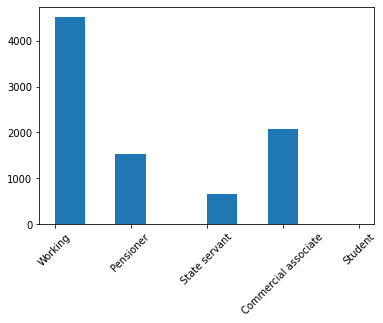

In [ ]:
print(df_.income_type.value_counts())
plt.hist(df_.income_type)
plt.xticks(rotation=45)
plt.show()

Secondary / secondary special    6070
Higher education                 2249
Incomplete higher                 334
Lower secondary                   100
Academic degree                     6
Name: edu_type, dtype: int64


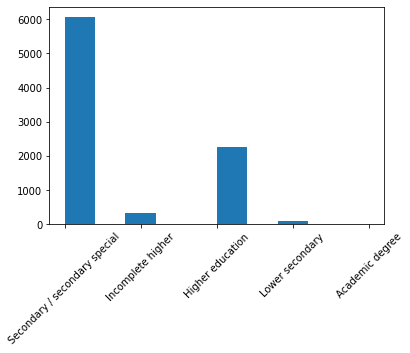

In [ ]:
print(df_.edu_type.value_counts())
plt.hist(df_.edu_type)
plt.xticks(rotation=45)
plt.show()
#	['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']

In [ ]:
df_.groupby(['edu_type'])['income_total'].mean().reset_index()

In [ ]:
print(df_.family_type.value_counts())
plt.hist(df_.family_type)
plt.xticks(rotation=45)
plt.show()

In [ ]:
print(df_.house_type.value_counts())
plt.hist(df_.house_type)
plt.xticks(rotation=45)
plt.show()

In [ ]:
print(df_.occyp_type.value_counts(dropna=False))

# 2. 전처리

In [ ]:
df_.FLAG_MOBIL.value_counts()

1    8759
Name: FLAG_MOBIL, dtype: int64

- FLAG_MOBIL 모든 값이 1이므로 제거



In [ ]:
df_.drop(['FLAG_MOBIL'], axis=1, inplace=True)
df_.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,num_card
25313,25313,F,N,N,7,157500.0,Working,Secondary / secondary special,Married,House / apartment,-13827,-1649,1,1,0,Cleaning staff,9.0,-26.0,2.0,1
9615,9615,M,Y,Y,5,202500.0,Working,Secondary / secondary special,Married,Co-op apartment,-11384,-2727,0,0,0,Managers,7.0,-19.0,1.0,6
4094,4094,F,N,Y,5,189000.0,Working,Secondary / secondary special,Separated,House / apartment,-15450,-428,0,1,0,NaN,6.0,-50.0,2.0,7
22592,22592,F,N,Y,5,157500.0,Working,Secondary / secondary special,Married,House / apartment,-13039,-3375,0,0,0,Laborers,7.0,-10.0,1.0,2
23782,23782,F,N,N,4,67500.0,Working,Secondary / secondary special,Married,House / apartment,-13297,-5877,0,1,0,NaN,6.0,-16.0,2.0,4


### 결측치

In [ ]:
df_.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
work_phone          0
phone               0
email               0
occyp_type       3666
family_size         0
begin_month         0
credit              0
num_card            0
dtype: int64

In [ ]:
df_[df_['income_type']=='Pensioner']['occyp_type'].value_counts(dropna=False)

NaN               2055
Laborers             3
Core staff           2
Accountants          1
Managers             1
Drivers              1
Medicine staff       1
Name: occyp_type, dtype: int64

- income_type이 Pensioner인 행의 occyp_type은 대부분 결측치  
=> 결측 중 income_type이 Pensioner인 사람은 'Pensioner'라는 새로운 occyp_type 지정

In [ ]:
df_['occyp_type'] = np.where(((pd.notnull(df_['occyp_type'])==False) & (df_['income_type']=='Pensioner')), 'Pensioner', df_['occyp_type'])

In [ ]:
df_.occyp_type.isnull().sum()

1611

- 남은 3731개의 결측치 처리는 추후 진행

In [ ]:
df_[df_['income_type']=='Pensioner']['DAYS_EMPLOYED'].value_counts()

 365243    2053
-3680         1
-5521         1
-1325         1
-673          1
-443          1
-2208         1
-2745         1
-672          1
-620          1
-586          1
-198          1
Name: DAYS_EMPLOYED, dtype: int64

## 이상치 처리

### 파생 변수

In [ ]:
df_[df_['DAYS_EMPLOYED']>0]['DAYS_EMPLOYED'].value_counts()

365243    1508
Name: DAYS_EMPLOYED, dtype: int64

- DAYS_EMPLOYED 양수인 값은 모두 365243으로 이상치로 판단함

In [ ]:
# 음수값 절댓값 취해서 양수로 변환

feats = ['DAYS_BIRTH', 'begin_month', 'DAYS_EMPLOYED']
for feat in feats:
    df_[feat]=np.abs(df_[feat])

In [ ]:
# 이해하기 쉽게 나이와 근속년차 변수 생성

df_['Age'] = df_['DAYS_BIRTH']//365
df_['career_year'] = np.ceil(df_['DAYS_EMPLOYED']/365)
df_['career_start_age'] = df_['Age'] - df_['career_year']
df_.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,num_card,ability,ability2,income_unit,Age,career_year,career_start_age
25313,25313,F,N,N,7,157500.0,Working,Secondary / secondary special,Married,House / apartment,13827,1649,1,1,0,Cleaning staff,9.0,26.0,2.0,1,10.177048,95.512432,17500.000000,37,5.0,32.0
9615,9615,M,Y,Y,5,202500.0,Working,Secondary / secondary special,Married,Co-op apartment,11384,2727,0,0,0,Managers,7.0,19.0,1.0,6,14.350507,74.257426,28928.571429,31,8.0,23.0
4094,4094,F,N,Y,5,189000.0,Working,Secondary / secondary special,Separated,House / apartment,15450,428,0,1,0,NaN,6.0,50.0,2.0,7,11.903262,441.588785,31500.000000,42,2.0,40.0
22592,22592,F,N,Y,5,157500.0,Working,Secondary / secondary special,Married,House / apartment,13039,3375,0,0,0,Laborers,7.0,10.0,1.0,2,9.595467,46.666667,22500.000000,35,10.0,25.0
23782,23782,F,N,N,4,67500.0,Working,Secondary / secondary special,Married,House / apartment,13297,5877,0,1,0,NaN,6.0,16.0,2.0,4,3.520392,11.485452,11250.000000,36,17.0,19.0


In [ ]:
# ability: 소득 / (살아온 일 수 + 근무일 수) or 소득/근무일 수
df_['ability'] = df_['income_total'] / (df_['DAYS_BIRTH'] + df_['DAYS_EMPLOYED'])
df_['ability2'] = df_['income_total'] / df_['DAYS_EMPLOYED']

# income_unit: 소득 / 가족 수
df_['income_unit'] = df_['income_total']/df_['family_size'] # 가족 수 이상치 추후 처리

In [ ]:
df_.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,num_card,ability,ability2,income_unit
25313,25313,F,N,N,7,157500.0,Working,Secondary / secondary special,Married,House / apartment,13827,1649,1,1,0,Cleaning staff,9.0,26.0,2.0,1,10.177048,95.512432,17500.000000
9615,9615,M,Y,Y,5,202500.0,Working,Secondary / secondary special,Married,Co-op apartment,11384,2727,0,0,0,Managers,7.0,19.0,1.0,6,14.350507,74.257426,28928.571429
4094,4094,F,N,Y,5,189000.0,Working,Secondary / secondary special,Separated,House / apartment,15450,428,0,1,0,NaN,6.0,50.0,2.0,7,11.903262,441.588785,31500.000000
22592,22592,F,N,Y,5,157500.0,Working,Secondary / secondary special,Married,House / apartment,13039,3375,0,0,0,Laborers,7.0,10.0,1.0,2,9.595467,46.666667,22500.000000
23782,23782,F,N,N,4,67500.0,Working,Secondary / secondary special,Married,House / apartment,13297,5877,0,1,0,NaN,6.0,16.0,2.0,4,3.520392,11.485452,11250.000000


- income_type이 Pensioner인 행의 DAYS_EMPLOYED 값이 대부분 이상치(365243)로 설정되어 있는 문제  
=> 다른 사람들의 평균으로 대체

In [ ]:
# 연금받는 사람들 나이의 중앙값
a = df_[df_['income_type']=='Pensioner']['Age'].median()

In [ ]:
# 연금받는 사람들이 아닌 사람들 업무 시작 나이의 중앙값
b = df_[df_['income_type']!='Pensioner']['career_start_age'].median()

=> 연금받는 사람들의 근속년수를 (a-b)로 대체

In [ ]:
df_['career_year'] = np.where(((df_['income_type']=='Pensioner') & (df_['DAYS_EMPLOYED']==365243)), (a-b), df_['career_year'])

In [ ]:
# 이에 맞게 'DAYS_EMPLOYED'도 수정
df_['DAYS_EMPLOYED'] = np.where(((df_['income_type']=='Pensioner') & (df_['DAYS_EMPLOYED']==365243)), (a-b)*365, df_['DAYS_EMPLOYED'])

In [ ]:
df_['career_start_age'] = df_['Age'] - df_['career_year']
df_[df_['income_type']=='Pensioner'][['DAYS_EMPLOYED', 'career_year', 'career_start_age']]

,DAYS_EMPLOYED,career_year,career_start_age
11690,10585.0,29.0,35.0
20752,10585.0,29.0,32.0
19190,10585.0,29.0,6.0
17278,672.0,2.0,31.0
15335,10585.0,29.0,12.0
...,...,...,...
19467,10585.0,29.0,30.0
4029,10585.0,29.0,28.0
20605,10585.0,29.0,26.0
19580,10585.0,29.0,26.0


- occyp_type 변수를 income_total변수를 기준으로 categorizing하려하였으나 income_total변수와의 다중공선성 문제로 occyp_type 변수를 아예 삭제?  

In [ ]:
df_.drop('occyp_type', axis=1, inplace=True)

In [ ]:
# df_.to_csv("train_ppc.csv")

- widow의 gender가 M인 경우 -> 이상치로 고려하여 F로 바꿈

In [ ]:
df_.loc[(df_['family_type']=='Widow') & (df_['gender']=='M'),'gender'] = 'F'

In [ ]:
### widow의 income_total 매우 낮은 인사이트 찾음 => 나중에 넣자

- 범주형 변수 -> 숫자 변환하기

In [ ]:
df_['gender'] = df_['gender'].apply(lambda x: 0 if x=='M' else 1)
df_['car'] = df_['car'].apply(lambda x: 1 if x=='Y' else 0)
df_['reality'] = df_['reality'].apply(lambda x: 1 if x=='Y' else 0)

In [ ]:
df_2 = df_.copy()

In [ ]:
# LabelEncoder
features = ['income_type', 'family_type', 'house_type']
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_2[features] = df_2[features].apply(le.fit_transform)

In [ ]:
# OrdinalEncoder
# edu_type  Ordinal Encoding
# 참고: https://books.google.co.kr/books?id=4eRFEAAAQBAJ&pg=PA428&dq=%27Secondary+/+secondary+special%27,+%27Incomplete+higher%27,+%27Higher+education%27,+%27Lower+secondary%27,+%27Academic+degree%27&hl=ko&sa=X&ved=2ahUKEwjUpuKtz4r0AhUNH3AKHS7wAPkQ6AF6BAgIEAI#v=onepage&q='Secondary%20%2F%20secondary%20special'%2C%20'Incomplete%20higher'%2C%20'Higher%20education'%2C%20'Lower%20secondary'%2C%20'Academic%20degree'&f=false
edu_dict = {'Lower secondary':0,  'Secondary / secondary special':0,
            'Incomplete higher':1,
            'Higher education':2, 'Academic degree':2}

df_2['edu_type'] = df_2['edu_type'].map(edu_dict)

In [ ]:
# df_2.to_csv("data/train_ppc3.csv")

### 상관관계 파악하기

In [ ]:
features = ['gender', 'car', 'reality', 'child_num', 'income_total', 'income_type', 'income_unit', 'edu_type', 'family_type', 'house_type', 
            'work_phone', 'phone', 'email', 'family_size', 'Age', 'career_year','ability','ability2', 'num_card','credit']
# plt.pcolor(df_2[features])

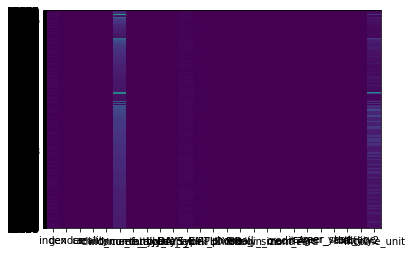

In [ ]:
plt.pcolor(df_2)
plt.xticks(np.arange(0.5, len(df_2.columns), 1), df_.columns)
plt.yticks(np.arange(0.5, len(df_2.index), 1), df_.index)
plt.show()

In [ ]:
df_2[features].corr(method='pearson')['income_total'].sort_values(ascending=False)

income_total    1.000000
ability         0.746919
income_unit     0.714088
ability2        0.250949
car             0.220338
email           0.087179
num_card        0.049676
reality         0.038093
child_num       0.026223
family_size     0.024119
phone           0.013752
house_type     -0.004490
credit         -0.012535
family_type    -0.016296
work_phone     -0.034946
Age            -0.059389
income_type    -0.073091
career_year    -0.119632
gender         -0.199097
edu_type       -0.232049
Name: income_total, dtype: float64

In [ ]:
df_2[features].corr(method='pearson')['credit'].sort_values(ascending=False)

credit          1.000000
num_card        0.161282
edu_type        0.023987
Age             0.013226
reality         0.006177
email           0.001986
career_year     0.001442
gender          0.000184
child_num       0.000163
family_type    -0.000334
family_size    -0.000436
car            -0.001155
income_type    -0.003076
ability2       -0.003379
income_unit    -0.005509
phone          -0.006537
house_type     -0.010261
ability        -0.011250
work_phone     -0.011967
income_total   -0.012535
Name: credit, dtype: float64

In [ ]:
df_2[features].corr(method='pearson')['num_card'].sort_values(ascending=False)

num_card        1.000000
credit          0.161282
income_total    0.049676
gender          0.035643
ability         0.028756
income_unit     0.027118
career_year     0.018927
car             0.018001
family_size     0.014973
reality         0.010463
child_num       0.008199
work_phone      0.006967
phone           0.005917
email           0.004092
Age             0.003338
income_type     0.002610
house_type     -0.002891
family_type    -0.012871
edu_type       -0.017949
ability2       -0.021975
Name: num_card, dtype: float64

In [ ]:
df_2[features].corr(method='pearson')['ability'].sort_values(ascending=False)

ability         1.000000
income_total    0.746919
income_unit     0.477359
ability2        0.427906
car             0.246699
child_num       0.168998
family_size     0.141357
email           0.128064
house_type      0.124077
income_type     0.097318
work_phone      0.088646
num_card        0.028756
credit         -0.010079
phone          -0.015331
family_type    -0.042939
reality        -0.054464
edu_type       -0.260246
gender         -0.283376
Age            -0.581895
career_year    -0.591428
Name: ability, dtype: float64

### (불균형 데이터 -> 오버샘플링)

# 우리의 목표는 신용도가 안 좋은 사람을 골라내는 작업  
(더군다나 0,1인 그룹이 2인 그룹보다 상대적으로 매우 적음)  
=> credit이 1인 사람을 모두 0으로 바꿔서 합쳐버려  
=> 다중분류를 이진분류 작업으로 바꿔버려

In [ ]:
new_credit = df['credit'].apply(lambda x: 0 if x==1 else x)
new_credit.value_counts()

2.0    16968
0.0     9489
Name: credit, dtype: int64

In [ ]:
# 나이대별 신용도 분포
df_2['grp_age'] = df_2['Age']//10
age_credit = df_2.groupby(['grp_age','credit'])['index'].count().reset_index()
age_credit.rename(columns={'index':'cnt'}, inplace=True)
age_credit

,grp_age,credit,cnt
0,2,0.0,138
1,2,1.0,402
2,2,2.0,682
3,3,0.0,351
4,3,1.0,657
5,3,2.0,1440
6,4,0.0,270
7,4,1.0,560
8,4,2.0,1391
9,5,0.0,241


In [ ]:
age_sum = age_credit.groupby('grp_age')['cnt'].sum()
age_sum

grp_age
2    1700
3    3407
4    3061
5    2680
6    1251
Name: cnt, dtype: int64

In [ ]:
merged_df_ = age_credit.merge(age_sum, on='grp_age')
merged_df_['pct'] = merged_df_['cnt_x'] / merged_df_['cnt_y']
# merged_df_.drop(columns = ['cnt_x', 'cnt_y'], inplace=True)
merged_df_

,grp_age,credit,cnt_x,cnt_y,pct
0,2,0.0,759,1700,0.446471
1,2,2.0,941,1700,0.553529
2,3,0.0,1470,3407,0.431465
3,3,2.0,1937,3407,0.568535
4,4,0.0,1257,3061,0.410650
5,4,2.0,1804,3061,0.589350
6,5,0.0,1124,2680,0.419403
7,5,2.0,1556,2680,0.580597
8,6,0.0,515,1251,0.411671
9,6,2.0,736,1251,0.588329


In [ ]:
# 신용도별 나이 분포 -> 나이대 분포와 거의 비슷해서 인사이트가 없어 보임, 신용카드 연체 요소에는 나이가 고려대상이 아님.
credit_age = merged_df_.groupby(['credit', 'grp_age'])['cnt_x'].sum().reset_index()
gp = credit_age.groupby('credit')['cnt_x'].sum()
merged_df_2 = credit_age.merge(gp, on='credit')
merged_df_2['cr_pct'] = merged_df_2['cnt_x_x'] / merged_df_2['cnt_x_y']
merged_df_2.drop(columns = ['cnt_x_x', 'cnt_x_y'], inplace=True)
merged_df_2

,credit,grp_age,cr_pct
0,0.0,2,0.148098
1,0.0,3,0.286829
2,0.0,4,0.245268
3,0.0,5,0.219317
4,0.0,6,0.100488
5,2.0,2,0.134930
6,2.0,3,0.277746
7,2.0,4,0.258675
8,2.0,5,0.223114
9,2.0,6,0.105535


In [ ]:
# 나이대 분포
grp_age = df_2['grp_age'].value_counts().reset_index()
grp_age.rename(columns={'grp_age':'cnt', 'index': 'grp_age'}, inplace=True)
total = grp_age.sum(axis=0)[1]
grp_age['pct'] = grp_age['cnt'] / total
grp_age.sort_values(by='grp_age')

KeyError: ignored

<!-- - 신용도가 높은 사람들의 가입 기간 고려하여 비교하기 -->

## 카드 개수에 따른 신용도

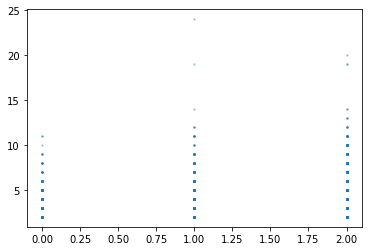

In [ ]:
card_credit = df_[df_['num_card']>=2][['num_card', 'credit']]
plt.scatter(x='credit',y='num_card', data=card_credit, alpha=.3, s=2)
plt.show()

In [ ]:
X = card_credit.groupby(['num_card'])['credit'].mean().reset_index()
Y = card_credit.groupby(['num_card'])['credit'].count().reset_index()

XY = pd.merge(X, Y, on=['num_card'], suffixes=('_mean', '_count'))
XY

,num_card,credit_mean,credit_count
0,2,1.455934,2553
1,3,1.537010,1378
2,4,1.623620,906
3,5,1.644401,509
4,6,1.698925,279
5,7,1.745223,157
6,8,1.678899,109
7,9,1.571429,49
8,10,1.833333,36
9,11,1.500000,22


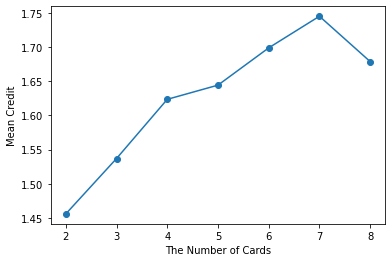

In [ ]:
plt.plot(XY.head(7)['num_card'], XY.head(7)['credit_mean'],marker='o')
plt.xlabel("The Number of Cards")
plt.ylabel("Mean Credit")
plt.show()

In [ ]:
# 카드 개수에 따른 수입
card_inc = df_[df_['num_card']>=2][['num_card', 'income_total']]
X_ = card_inc.groupby(['num_card'])['income_total'].mean().reset_index()
Y_ = card_inc.groupby(['num_card'])['income_total'].count().reset_index()

XY_ = pd.merge(X_, Y_, on=['num_card'], suffixes=('_mean', '_count'))
XY_

,num_card,income_total_mean,income_total_count
0,2,181017.724442,2553
1,3,183405.726052,1378
2,4,190476.655629,906
3,5,204933.925344,509
4,6,189545.161290,279
5,7,182622.611465,157
6,8,205720.183486,109
7,9,208974.489796,49
8,10,173750.000000,36
9,11,214159.090909,22


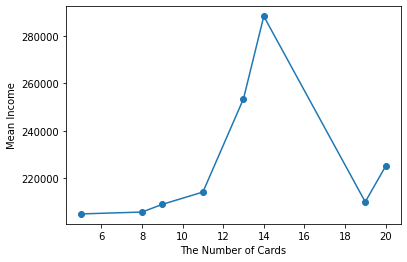

In [ ]:
plt.plot(XY_[XY_['income_total_mean']>=200000]['num_card'], XY_[XY_['income_total_mean']>=200000]['income_total_mean'],marker='o')
plt.xlabel("The Number of Cards")
plt.ylabel("Mean Income")
plt.show()

In [ ]:
# 카드 개수에 따른 이메일 소유 여부
card_email = df_[df_['num_card']>=2][['num_card', 'email']]
X_1 = card_email.groupby(['num_card'])['email'].mean().reset_index()
Y_1 = card_email.groupby(['num_card'])['email'].count().reset_index()

XY_1 = pd.merge(X_1, Y_1, on=['num_card'], suffixes=('_mean', '_count'))
XY_1

,num_card,email_mean,email_count
0,2,0.093615,2553
1,3,0.089260,1378
2,4,0.090508,906
3,5,0.110020,509
4,6,0.103943,279
5,7,0.101911,157
6,8,0.045872,109
7,9,0.081633,49
8,10,0.083333,36
9,11,0.045455,22


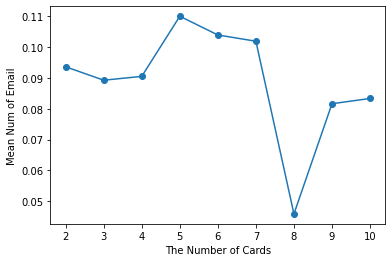

In [ ]:
plt.plot(XY_1.head(9)['num_card'], XY_1.head(9)['email_mean'],marker='o')
plt.xlabel("The Number of Cards")
plt.ylabel("Mean Num of Email")
plt.show()

In [ ]:
# 가족 수에 따른 근무일 수
mean = df_.groupby('family_size')['DAYS_EMPLOYED'].mean().reset_index()
count = df_.groupby('family_size')['DAYS_EMPLOYED'].count().reset_index()
mean_count = pd.merge(mean, count, on=['family_size'], suffixes=('_mean', '_count'))
mean_count

,family_size,DAYS_EMPLOYED_mean,DAYS_EMPLOYED_count
0,1.0,4504.253527,2410
1,2.0,4419.630556,6434
2,3.0,2484.872126,2088
3,4.0,2484.197382,993
4,5.0,2780.965035,143
5,6.0,2785.500000,24
6,7.0,3051.000000,4
7,9.0,1649.000000,1
8,15.0,1689.000000,1
9,20.0,1853.000000,1


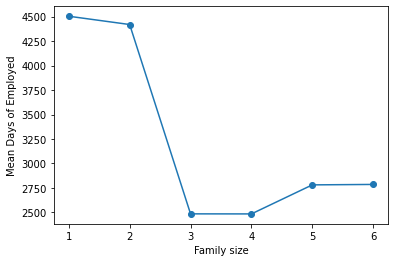

In [ ]:
plt.plot(mean_count.head(6)['family_size'], mean_count.head(6)['DAYS_EMPLOYED_mean'],marker='o')
plt.xlabel("Family size")
plt.ylabel("Mean Days of Employed")
plt.show()

In [ ]:
# 가족 수에 따른 신용도
mean = df_.groupby('family_size')['credit'].mean().reset_index()
count = df_.groupby('family_size')['credit'].count().reset_index()
mean_count = pd.merge(mean, count, on=['family_size'], suffixes=('_mean', '_count'))
mean_count

,family_size,credit_mean,credit_count
0,1.0,1.419917,2410
1,2.0,1.430992,6434
2,3.0,1.398467,2088
3,4.0,1.434038,993
4,5.0,1.447552,143
5,6.0,1.375000,24
6,7.0,1.000000,4
7,9.0,2.000000,1
8,15.0,2.000000,1
9,20.0,2.000000,1


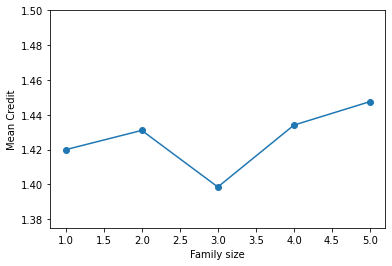

In [ ]:
plt.plot(mean_count.head(5)['family_size'], mean_count.head(5)['credit_mean'],marker='o')
plt.xlabel("Family size")
plt.ylabel("Mean Credit")
plt.ylim(1.375,1.5)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


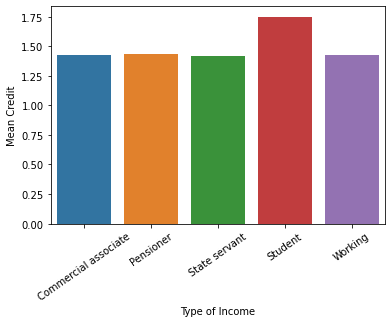

In [ ]:
inc_credit = df_.groupby('income_type')['credit'].mean().reset_index()
sns.barplot(inc_credit['income_type'], inc_credit['credit'])
plt.xticks(rotation=35)
plt.xlabel('Type of Income')
plt.ylabel("Mean Credit")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


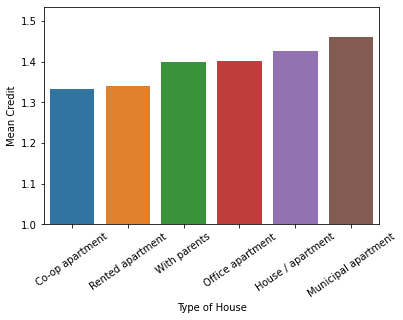

In [ ]:
hs_credit = df_.groupby('house_type')['credit'].mean().reset_index()
hs_credit = hs_credit.sort_values(by='credit',ascending=True)
sns.barplot(hs_credit['house_type'], hs_credit['credit'])
plt.xticks(rotation=35)
plt.ylim(1.0,)
plt.xlabel('Type of House')
plt.ylabel("Mean Credit")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


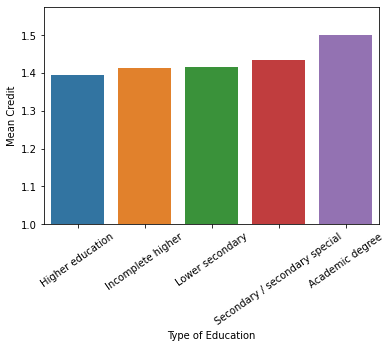

In [ ]:
edu_credit = df_.groupby('edu_type')['credit'].mean().reset_index()
edu_credit = edu_credit.sort_values(by='credit',ascending=True)
sns.barplot(edu_credit['edu_type'], edu_credit['credit'])
plt.xticks(rotation=35)
plt.ylim(1.0,)
plt.xlabel('Type of Education')
plt.ylabel("Mean Credit")
plt.show()

In [ ]:
df_.groupby(['house_type', 'edu_type'])['credit'].mean().reset_index()

,house_type,edu_type,credit
0,Co-op apartment,Higher education,1.238095
1,Co-op apartment,Incomplete higher,1.333333
2,Co-op apartment,Lower secondary,1.000000
3,Co-op apartment,Secondary / secondary special,1.476190
4,House / apartment,Academic degree,1.500000
5,House / apartment,Higher education,1.399930
6,House / apartment,Incomplete higher,1.418667
7,House / apartment,Lower secondary,1.434783
8,House / apartment,Secondary / secondary special,1.435255
9,Municipal apartment,Higher education,1.366197


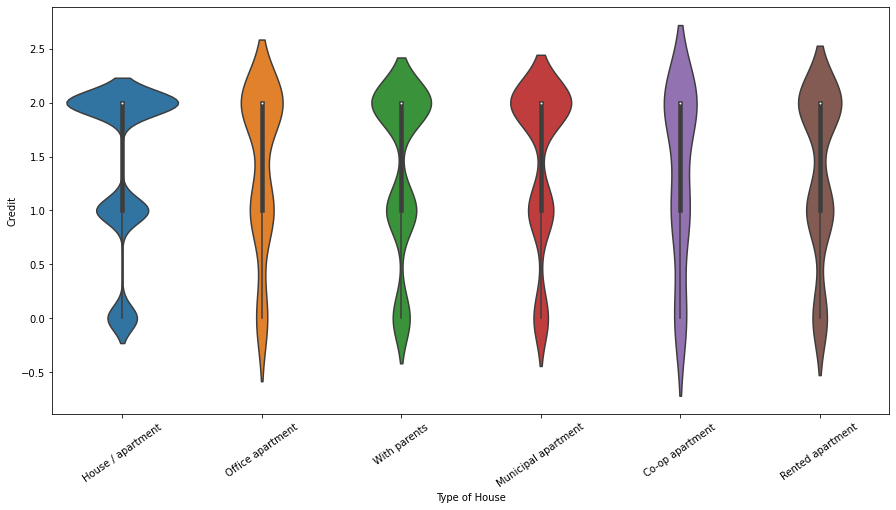

In [ ]:
# House type에 따른 신용도
plt.figure(figsize=(15,7.5))
sns.violinplot(x = 'house_type', y = 'credit', data = df_)

plt.xticks(rotation=35)
plt.xlabel('Type of House')
plt.ylabel("Credit")
plt.show()

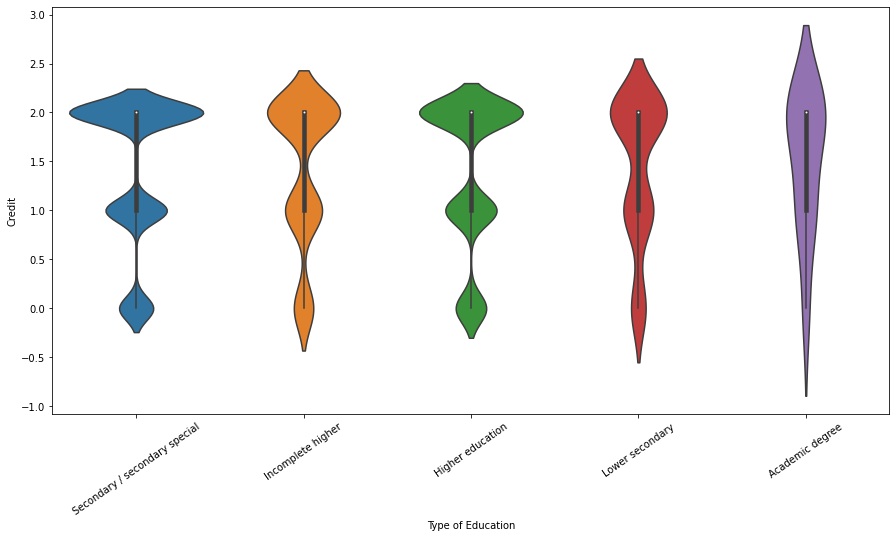

In [ ]:
# Edu type에 따른 신용도
plt.figure(figsize=(15,7.5))
sns.violinplot(x = 'edu_type', y = 'credit', data = df_)

plt.xticks(rotation=35)
plt.xlabel('Type of Education')
plt.ylabel("Credit")
plt.show()

# 모델링
## ANN - 이진 분류

In [ ]:
df_2.shape

(8759, 26)

In [ ]:
df_2.columns

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'work_phone', 'phone', 'email', 'family_size',
       'begin_month', 'credit', 'num_card', 'Age', 'career_year',
       'career_start_age', 'ability', 'ability2', 'income_unit'],
      dtype='object')

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from sklearn.preprocessing import StandardScaler

tf.random.set_seed(0)
X = df_2.drop(columns=['index', 'credit'], axis=1)
y = df_2['credit']
y = y.apply(lambda x: 1 if x==2 else x)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(6569, 24) (2190, 24)
(6569,) (2190,)


In [ ]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=X.shape[1]))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               6400      
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 129       
Total params: 39,425
Trainable params: 39,425
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=False)
mc = ModelCheckpoint(filepath='best_model.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
history = model.fit(X_train, y_train, 
                    batch_size=10, 
                    validation_split=0.1, 
                    epochs=500, 
                    callbacks=[es, mc])

Epoch 1/500
592/592 [==============================] - 3s 4ms/step - loss: 0.6314 - accuracy: 0.6654 - val_loss: 0.6183 - val_accuracy: 0.6545
Epoch 2/500
592/592 [==============================] - 2s 4ms/step - loss: 0.5736 - accuracy: 0.7201 - val_loss: 0.5806 - val_accuracy: 0.7078
Epoch 3/500
592/592 [==============================] - 2s 4ms/step - loss: 0.5464 - accuracy: 0.7341 - val_loss: 0.5909 - val_accuracy: 0.7017
Epoch 4/500
592/592 [==============================] - 2s 4ms/step - loss: 0.5308 - accuracy: 0.7456 - val_loss: 0.5813 - val_accuracy: 0.7078
Epoch 5/500
592/592 [==============================] - 2s 4ms/step - loss: 0.5228 - accuracy: 0.7503 - val_loss: 0.5714 - val_accuracy: 0.7062
Epoch 6/500
592/592 [==============================] - 2s 4ms/step - loss: 0.5142 - accuracy: 0.7524 - val_loss: 0.5866 - val_accuracy: 0.7062
Epoch 7/500
592/592 [==============================] - 2s 4ms/step - loss: 0.5017 - accuracy: 0.7590 - val_loss: 0.5930 - val_accuracy: 0.7047

(0.0, 0.7641885727643967)

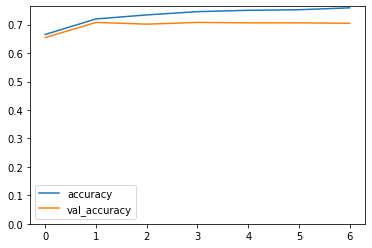

In [ ]:
df_history = pd.DataFrame(history.history)
df_h = df_history.loc[:, ['accuracy', 'val_accuracy']]
df_h.plot()
plt.ylim(0,)

min_val_loss: 0.5016802549362183


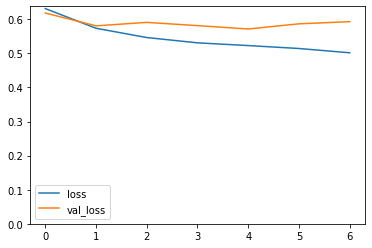

In [ ]:
df_h2 = df_history.loc[:, ['loss', 'val_loss']]
df_h2.plot()
plt.ylim(0,)
print(f"min_val_loss: {df_h2['loss'].min()}")

In [ ]:
score = model.evaluate(X_test, y_test)
print(f'test loss: {score[0]}')
print(f'test accuracy: {score[1]}')

69/69 [==============================] - 0s 3ms/step - loss: 0.5405 - accuracy: 0.7493
test loss: 0.5404890179634094
test accuracy: 0.749315083026886


In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
lgbm_wrapper = LGBMClassifier(n_estimators=400, random_state=0)

In [ ]:
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", 
                 eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)

[1]	valid_0's binary_logloss: 0.639179	valid_0's binary_logloss: 0.639179
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.617252	valid_0's binary_logloss: 0.617252
[3]	valid_0's binary_logloss: 0.599425	valid_0's binary_logloss: 0.599425
[4]	valid_0's binary_logloss: 0.584692	valid_0's binary_logloss: 0.584692
[5]	valid_0's binary_logloss: 0.572573	valid_0's binary_logloss: 0.572573
[6]	valid_0's binary_logloss: 0.562225	valid_0's binary_logloss: 0.562225
[7]	valid_0's binary_logloss: 0.553405	valid_0's binary_logloss: 0.553405
[8]	valid_0's binary_logloss: 0.546141	valid_0's binary_logloss: 0.546141
[9]	valid_0's binary_logloss: 0.54052	valid_0's binary_logloss: 0.54052
[10]	valid_0's binary_logloss: 0.53471	valid_0's binary_logloss: 0.53471
[11]	valid_0's binary_logloss: 0.530017	valid_0's binary_logloss: 0.530017
[12]	valid_0's binary_logloss: 0.525936	valid_0's binary_logloss: 0.525936
[13]	valid_0's binary_logloss: 0.522607	valid_0's 

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))

In [ ]:
get_clf_eval(y_test, preds)

오차행렬:
 [[ 388  456]
 [  39 1307]]

정확도: 0.7740
정밀도: 0.7413
재현율: 0.9710
F1: 0.8408
AUC: 0.7154


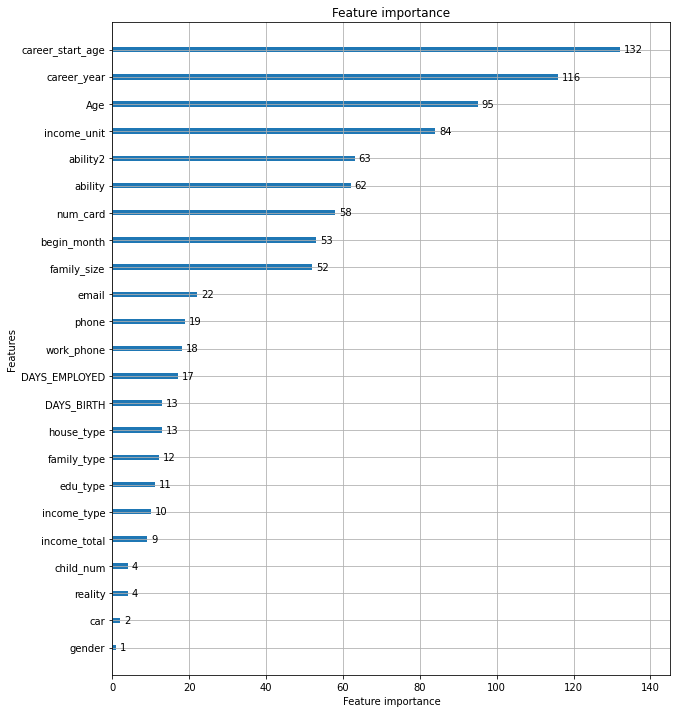

In [ ]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax=ax).set_yticklabels(X.columns)
plt.show()

In [ ]:
X.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,num_card,Age,career_year,career_start_age,ability,ability2,income_unit
8076,1,0,1,0,101250.0,4,4,3,1,10179,1813.0,0,1,0,1.0,7.0,1,27,5.0,22.0,8.443129,55.846663,101250.0
4803,1,0,1,0,101250.0,1,4,4,1,22059,10585.0,0,1,0,1.0,30.0,4,60,29.0,31.0,0.261424,0.277213,101250.0
12317,1,0,1,0,101250.0,1,4,4,1,22059,10585.0,0,1,0,1.0,2.0,2,60,29.0,31.0,0.261424,0.277213,101250.0
14668,1,0,1,0,103500.0,4,4,1,1,10396,564.0,0,0,1,2.0,5.0,2,28,2.0,26.0,9.443431,183.510638,51750.0
8190,1,0,1,0,103500.0,4,4,1,1,10396,564.0,0,0,1,2.0,1.0,1,28,2.0,26.0,9.443431,183.510638,51750.0


# Label 바꾸지 않은 데이터 (0,1,2)

## ANN

In [ ]:
df_2.shape

(8759, 26)

In [ ]:
df_2.credit.value_counts()

2.0    5250
1.0    2388
0.0    1121
Name: credit, dtype: int64

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from sklearn.preprocessing import StandardScaler
tf.random.set_seed(0)

X = df_2.drop(columns=['index', 'credit'], axis=1)
y = df_2['credit']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
model = Sequential()
model.add(Dense(128, activation='sigmoid', input_dim=X.shape[1]))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(1, activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 128)               3200      
_________________________________________________________________
dense_19 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 65        
Total params: 11,521
Trainable params: 11,521
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
#es = EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=False)
#mc = ModelCheckpoint(filepath='best_model2.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
history = model.fit(X_train, y_train,  
                    validation_split=0.1, 
                    epochs=30, )

Epoch 1/30
185/185 [==============================] - 2s 5ms/step - loss: 0.0000e+00 - accuracy: 0.2713 - val_loss: 0.0000e+00 - val_accuracy: 0.3029
Epoch 2/30
185/185 [==============================] - 1s 5ms/step - loss: 0.0000e+00 - accuracy: 0.2713 - val_loss: 0.0000e+00 - val_accuracy: 0.3029
Epoch 3/30
185/185 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - accuracy: 0.2713 - val_loss: 0.0000e+00 - val_accuracy: 0.3029
Epoch 4/30
185/185 [==============================] - 1s 5ms/step - loss: 0.0000e+00 - accuracy: 0.2713 - val_loss: 0.0000e+00 - val_accuracy: 0.3029
Epoch 5/30
185/185 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - accuracy: 0.2713 - val_loss: 0.0000e+00 - val_accuracy: 0.3029
Epoch 6/30
185/185 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - accuracy: 0.2713 - val_loss: 0.0000e+00 - val_accuracy: 0.3029
Epoch 7/30
185/185 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - accuracy: 0.2

(0.0, 0.30447090715169906)

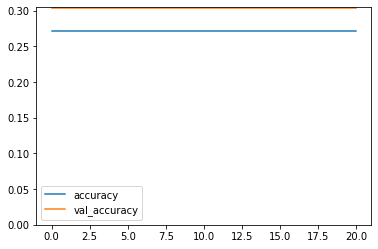

In [ ]:
df_history = pd.DataFrame(history.history)
df_h = df_history.loc[:, ['accuracy', 'val_accuracy']]
df_h.plot()
plt.ylim(0,)

- 쓰레기

## Catboost

In [ ]:
pip install catboost

     |████████████████████████████████| 76.3 MB 25 kB/s 


In [ ]:
import catboost as cb
from sklearn.metrics import classification_report

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_2.drop(columns=['index', 'credit'], axis=1)
y = df_2['credit']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
train_dataset = cb.Pool(X_train,y_train)
test_dataset = cb.Pool(X_test,y_test)

In [ ]:
model = cb.CatBoostClassifier(loss_function='MultiClass', eval_metric='Accuracy')

In [ ]:
grid = {'depth': [4, 6, 10],
'l2_leaf_reg': [1, 3, 5,],
'iterations': [50, 100, 150]}

In [ ]:
model.grid_search(grid,train_dataset)

0:	learn: 0.7134158	test: 0.7191781	best: 0.7191781 (0)	total: 117ms	remaining: 5.72s
1:	learn: 0.7115128	test: 0.7161339	best: 0.7191781 (0)	total: 126ms	remaining: 3.03s
2:	learn: 0.7134158	test: 0.7207002	best: 0.7207002 (2)	total: 137ms	remaining: 2.15s
3:	learn: 0.7134158	test: 0.7207002	best: 0.7207002 (2)	total: 147ms	remaining: 1.69s
4:	learn: 0.7134158	test: 0.7207002	best: 0.7207002 (2)	total: 158ms	remaining: 1.42s
5:	learn: 0.7134158	test: 0.7207002	best: 0.7207002 (2)	total: 167ms	remaining: 1.23s
6:	learn: 0.7134158	test: 0.7207002	best: 0.7207002 (2)	total: 179ms	remaining: 1.1s
7:	learn: 0.7134158	test: 0.7207002	best: 0.7207002 (2)	total: 193ms	remaining: 1.01s
8:	learn: 0.7134158	test: 0.7207002	best: 0.7207002 (2)	total: 202ms	remaining: 922ms
9:	learn: 0.7134158	test: 0.7207002	best: 0.7207002 (2)	total: 207ms	remaining: 827ms
10:	learn: 0.7134158	test: 0.7207002	best: 0.7207002 (2)	total: 211ms	remaining: 747ms
11:	learn: 0.7134158	test: 0.7207002	best: 0.7207002 (

{'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
               48,
               49,
             

In [ ]:
from sklearn.metrics import classification_report

pred = model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       259
         1.0       0.78      0.51      0.62       585
         2.0       0.74      0.99      0.84      1346

    accuracy                           0.74      2190
   macro avg       0.50      0.50      0.49      2190
weighted avg       0.66      0.74      0.68      2190



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


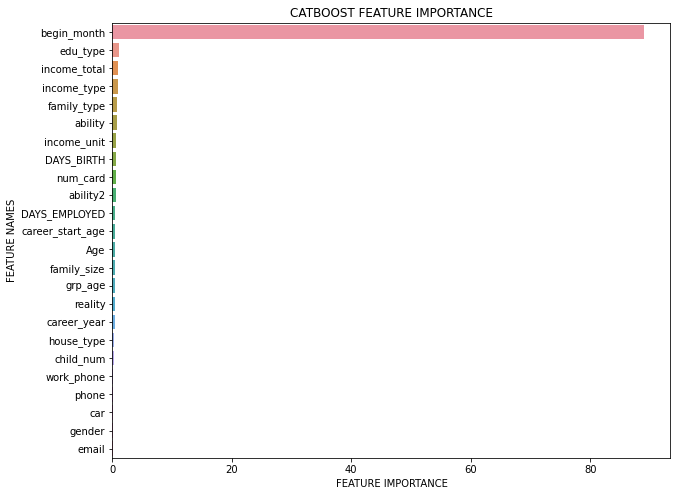

In [ ]:
def plot_feature_importance(importance,names,model_type):

  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df_ = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df_.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df_['feature_importance'], y=fi_df_['feature_names'])
  #Add chart labels
  plt.title(model_type + ' FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

plot_feature_importance(model.get_feature_importance(),X.columns,'CATBOOST')

In [ ]:
# Catboost 모델 정확도
model.score(X_test, y_test)

0.7442922374429224

In [ ]:
# 디폴트 하이퍼파라미터
model2 = cb.CatBoostClassifier(loss_function='MultiClass', eval_metric='Accuracy')
model2.fit(X_train, y_train,
           use_best_model=True, early_stopping_rounds=100, verbose=100)

You should provide test set for use best model. use_best_model parameter has been switched to false value.


Learning rate set to 0.0871
0:	learn: 0.7150251	total: 10.1ms	remaining: 10.1s
100:	learn: 0.7194398	total: 874ms	remaining: 7.78s
200:	learn: 0.7278125	total: 1.74s	remaining: 6.9s
300:	learn: 0.7380119	total: 2.61s	remaining: 6.06s
400:	learn: 0.7491247	total: 3.46s	remaining: 5.17s
500:	learn: 0.7625209	total: 4.33s	remaining: 4.31s
600:	learn: 0.7783529	total: 5.21s	remaining: 3.46s
700:	learn: 0.7932714	total: 6.1s	remaining: 2.6s
800:	learn: 0.8089511	total: 6.98s	remaining: 1.73s
900:	learn: 0.8253920	total: 7.88s	remaining: 866ms
999:	learn: 0.8409195	total: 8.73s	remaining: 0us


In [ ]:
from sklearn.metrics import classification_report

pred = model2.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.30      0.03      0.05       259
         1.0       0.72      0.51      0.60       585
         2.0       0.74      0.96      0.84      1346

    accuracy                           0.73      2190
   macro avg       0.59      0.50      0.49      2190
weighted avg       0.68      0.73      0.68      2190



In [ ]:
model2.score(X_test, y_test)

0.7310502283105023

## LGBM

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
lgbm_wrapper = LGBMClassifier(n_estimators=400, random_state=0)

In [ ]:
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, 
                 eval_metric="multi_logloss", 
                 eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)

[1]	valid_0's multi_logloss: 0.877114	valid_0's multi_logloss: 0.877114
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's multi_logloss: 0.854404	valid_0's multi_logloss: 0.854404
[3]	valid_0's multi_logloss: 0.83655	valid_0's multi_logloss: 0.83655
[4]	valid_0's multi_logloss: 0.821817	valid_0's multi_logloss: 0.821817
[5]	valid_0's multi_logloss: 0.809205	valid_0's multi_logloss: 0.809205
[6]	valid_0's multi_logloss: 0.798617	valid_0's multi_logloss: 0.798617
[7]	valid_0's multi_logloss: 0.789389	valid_0's multi_logloss: 0.789389
[8]	valid_0's multi_logloss: 0.781598	valid_0's multi_logloss: 0.781598
[9]	valid_0's multi_logloss: 0.775042	valid_0's multi_logloss: 0.775042
[10]	valid_0's multi_logloss: 0.76892	valid_0's multi_logloss: 0.76892
[11]	valid_0's multi_logloss: 0.763553	valid_0's multi_logloss: 0.763553
[12]	valid_0's multi_logloss: 0.759183	valid_0's multi_logloss: 0.759183
[13]	valid_0's multi_logloss: 0.755559	valid_0's multi_logloss: 0.755559
[

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       259
         1.0       0.77      0.51      0.62       585
         2.0       0.74      0.98      0.84      1346

    accuracy                           0.74      2190
   macro avg       0.50      0.50      0.49      2190
weighted avg       0.66      0.74      0.68      2190



In [ ]:
# LightGbm Classifier 모델 정확도
lgbm_wrapper.score(X_test, y_test)

0.7420091324200914